<a href="https://colab.research.google.com/github/alexandre-muller-cc/AirBnB/blob/main/Comp333_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Clean_Dataset.csv')

In [ ]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
#Check the number of unique value for each feature for futur number conversion.
df.nunique()

,0
Unnamed: 0,300153
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,476


Now check feature one by one

In [ ]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


Preprocessing of the data, one hot and binary encoding.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

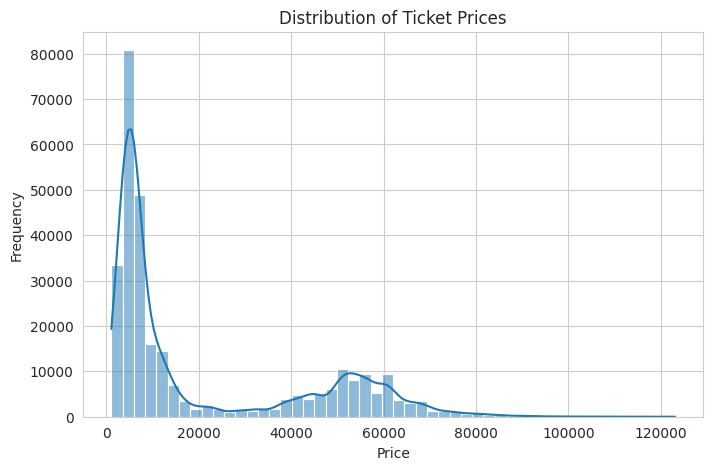

In [ ]:
# 1. Distribution of Ticket Prices
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Ticket Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

<ipython-input-15-641ee0fd475c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="airline", y="price", data=df, estimator=lambda x: x.mean(), ci=None)


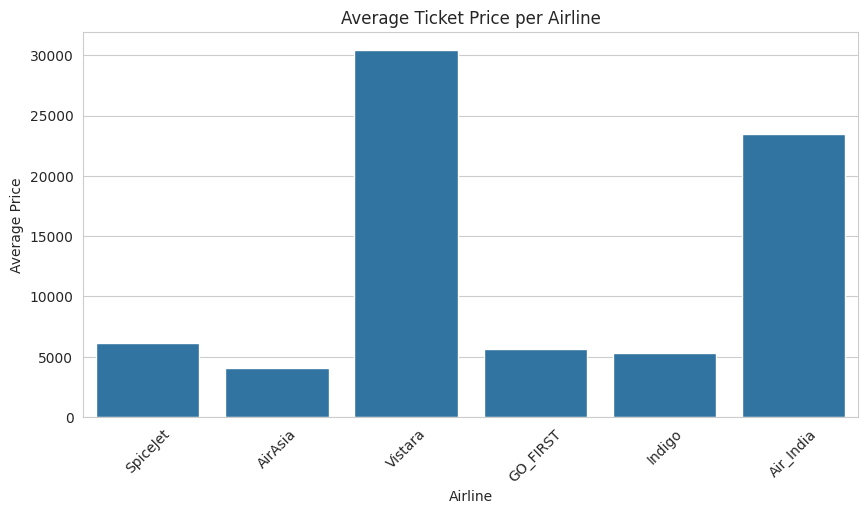

In [ ]:
# 2. Average Ticket Price per Airline
plt.figure(figsize=(10, 5))
sns.barplot(x="airline", y="price", data=df, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Average Ticket Price per Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.show()

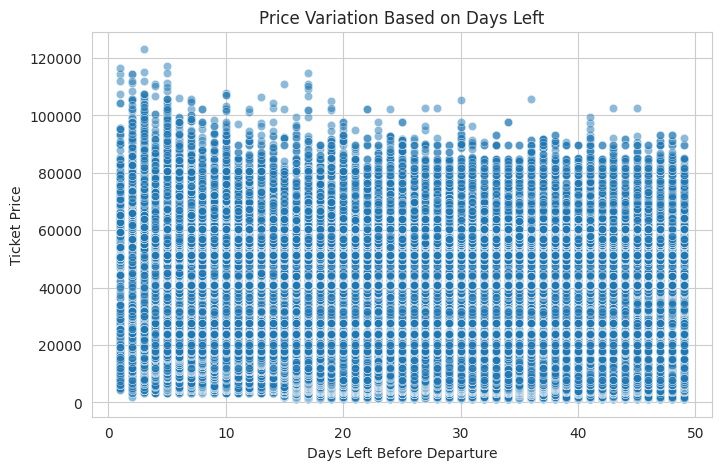

In [ ]:
# 3. Price Variation Based on Number of Days Left
plt.figure(figsize=(8, 5))
sns.scatterplot(x="days_left", y="price", data=df, alpha=0.5)
plt.title("Price Variation Based on Days Left")
plt.xlabel("Days Left Before Departure")
plt.ylabel("Ticket Price")
plt.show()

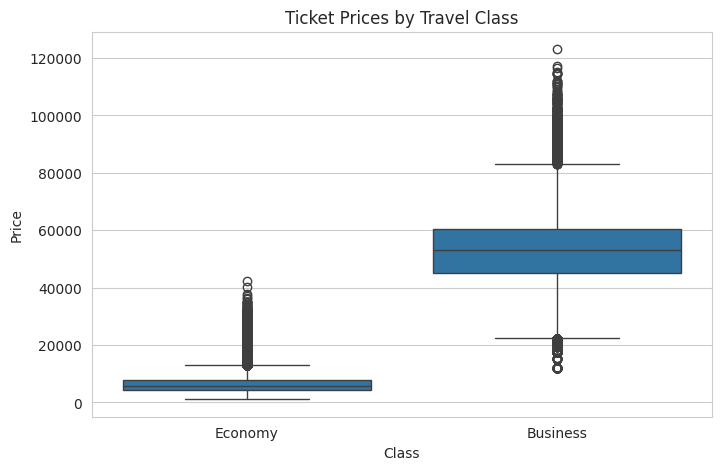

In [ ]:
# 4. Boxplot of Prices by Travel Class
plt.figure(figsize=(8, 5))
sns.boxplot(x="class", y="price", data=df)
plt.title("Ticket Prices by Travel Class")
plt.xlabel("Class")
plt.ylabel("Price")
plt.show()

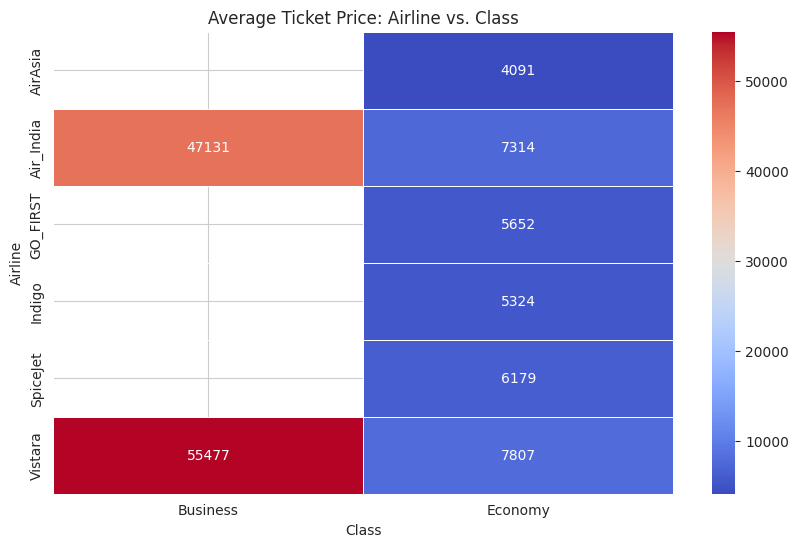

In [ ]:
# 1. Cross Analysis: Airline vs. Class on Ticket Prices
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(values="price", index="airline", columns="class", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5)
plt.title("Average Ticket Price: Airline vs. Class")
plt.xlabel("Class")
plt.ylabel("Airline")
plt.show()

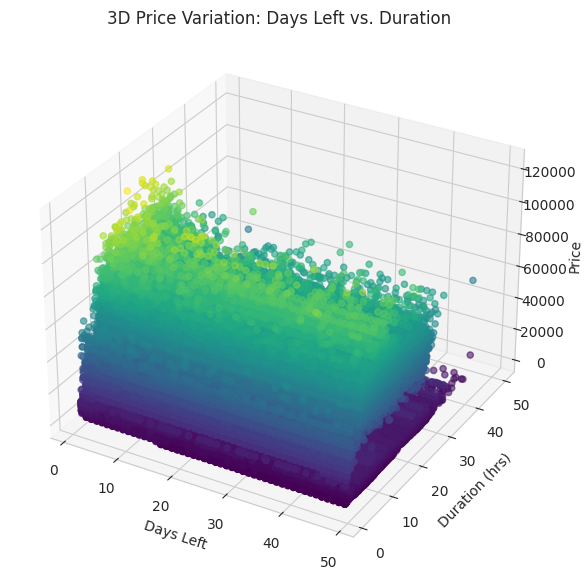

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["days_left"], df["duration"], df["price"], c=df["price"], cmap="viridis", alpha=0.6)

ax.set_xlabel("Days Left")
ax.set_ylabel("Duration (hrs)")
ax.set_zlabel("Price")
ax.set_title("3D Price Variation: Days Left vs. Duration")

plt.show()

In [ ]:
#Create function to change the data into numerical value based on their original value

df['class'] = df['class'].map({'Business': 1, 'Economy': 0})

In [ ]:
#Check to see if the function works
df['class'].value_counts()

,count
class,
0,206666
1,93487


In [ ]:
#Translate categorical to numerical data
labels =  pd.factorize(df.stops)[0]

In [ ]:
#Assign the value to the feature stops
df['stops'] = labels


In [ ]:
#Check that the values are well assigned
df.stops.value_counts()

,count
stops,
1,250863
0,36004
2,13286


In [ ]:
  df.stops.value_counts()

,count
stops,
1,250863
0,36004
2,13286


In [ ]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [ ]:
#Drop unnecessary columns
del df['Unnamed: 0']
del df['flight']

In [ ]:
#For the One hot encoding (Creating binary column values), For the Airline
df = df.join(pd.get_dummies(df.airline,prefix='airline',dtype = int))
#Now Drop the airline columns
del df['airline']
df

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,0,0,0,0,0,1
300149,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,0,0,0,0,0,1
300150,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,0,0,0,0,0,1
300151,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,0,0,0,0,0,1


In [ ]:
#For the One hot encoding (Creating binary column values), For the source_city
df = df.join(pd.get_dummies(df.source_city,prefix='source_city',dtype = int))
#Now Drop the airline columns
del df['source_city']
df

,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0,0,0,1,0,0,0
1,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0,0,0,1,0,0,0
2,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0,0,0,1,0,0,0
3,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1,0,0,1,0,0,0
4,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Morning,1,Evening,Hyderabad,1,10.08,49,69265,0,0,0,0,0,1,0,1,0,0,0,0
300149,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,0,0,0,0,0,1,0,1,0,0,0,0
300150,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,0,0,0,0,0,1,0,1,0,0,0,0
300151,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
#For the One hot encoding (Creating binary column values), For the destination_city
df = df.join(pd.get_dummies(df.destination_city,prefix='destination_city',dtype = int))
#Now Drop the destination_city columns
del df['destination_city']
df

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,Evening,0,Night,0,2.17,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Early_Morning,0,Morning,0,2.33,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,Early_Morning,0,Early_Morning,0,2.17,1,5956,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,Morning,0,Afternoon,0,2.25,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Morning,0,Morning,0,2.33,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Morning,1,Evening,1,10.08,49,69265,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300149,Afternoon,1,Night,1,10.42,49,77105,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300150,Early_Morning,1,Night,1,13.83,49,79099,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300151,Early_Morning,1,Evening,1,10.00,49,81585,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#For the One hot encoding (Creating binary column values), For the arrival_time
df = df.join(pd.get_dummies(df.arrival_time,prefix='arrival_time',dtype = int))
#Now Drop the arrival_time columns
del df['arrival_time']
df

,departure_time,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,Evening,0,0,2.17,1,5953,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,Early_Morning,0,0,2.33,1,5953,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Early_Morning,0,0,2.17,1,5956,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,Morning,0,0,2.25,1,5955,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,Morning,0,0,2.33,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Morning,1,1,10.08,49,69265,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
300149,Afternoon,1,1,10.42,49,77105,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300150,Early_Morning,1,1,13.83,49,79099,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300151,Early_Morning,1,1,10.00,49,81585,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
#For the One hot encoding (Creating binary column values), For the departure_time
df = df.join(pd.get_dummies(df.departure_time,prefix='departure_time',dtype = int))
#Now Drop the departure_time columns
del df['departure_time']
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
#From now on, we only have numerical value


In [ ]:
#Training for the regression model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Set y axis as price, x as everything else
X, Y = df.drop('price', axis=1), df.price

X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
Y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
300148,69265
300149,77105
300150,79099
300151,81585


In [ ]:
#Set training / testing variables, 25% for testing
X_Training, X_Testing, Y_Training, Y_Testing = train_test_split(X, Y, test_size=0.15)

In [ ]:
#Find CPU count to improve regressor speed by max potential
import multiprocessing
cpu_count = multiprocessing.cpu_count()

#Train with regressor
R = RandomForestRegressor(n_jobs=cpu_count)
R.fit(X_Training, Y_Training)

RandomForestRegressor(n_jobs=2)

In [ ]:
#Test training accuracy
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Y_Prediction = R.predict(X_Testing)
#Measure of variance
print('R2: ', r2_score(Y_Testing, Y_Prediction))
#Measure of average absolute difference between actual values and prediction
print('Mean Absolute Error: ', mean_absolute_error(Y_Testing, Y_Prediction))
#Measure of average squared difference between actual values and prediction
print('Mean Square Error: ', mean_squared_error(Y_Testing, Y_Prediction))
#Measure of square root of average squared difference between actual values and prediction
print('Root Mean Square Error: ', math.sqrt(mean_squared_error(Y_Testing, Y_Prediction)))

R2:  0.9853617329350884
Mean Absolute Error:  1063.7634320805698
Mean Square Error:  7588959.62985218
Root Mean Square Error:  2754.806641100638


Text(0.5, 1.0, 'Flight Price Prediction Comparison')

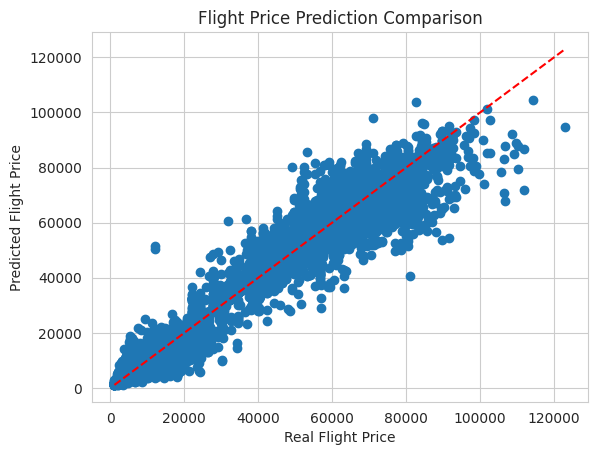

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_Testing, Y_Prediction)
plt.plot([min(Y_Testing), max(Y_Testing)], [min(Y_Testing), max(Y_Testing)], color='red', linestyle='dashed')
plt.xlabel('Real Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Flight Price Prediction Comparison')

In [ ]:
#Find what features are important, then sort in descending order
importances = R.feature_importances_
feature_names = X_Training.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
1,class,0.880436
2,duration,0.057309
3,days_left,0.018487
5,airline_Air_India,0.005158
9,airline_Vistara,0.004797
12,source_city_Delhi,0.003794
18,destination_city_Delhi,0.003356
15,source_city_Mumbai,0.002237
21,destination_city_Mumbai,0.001904
0,stops,0.001813


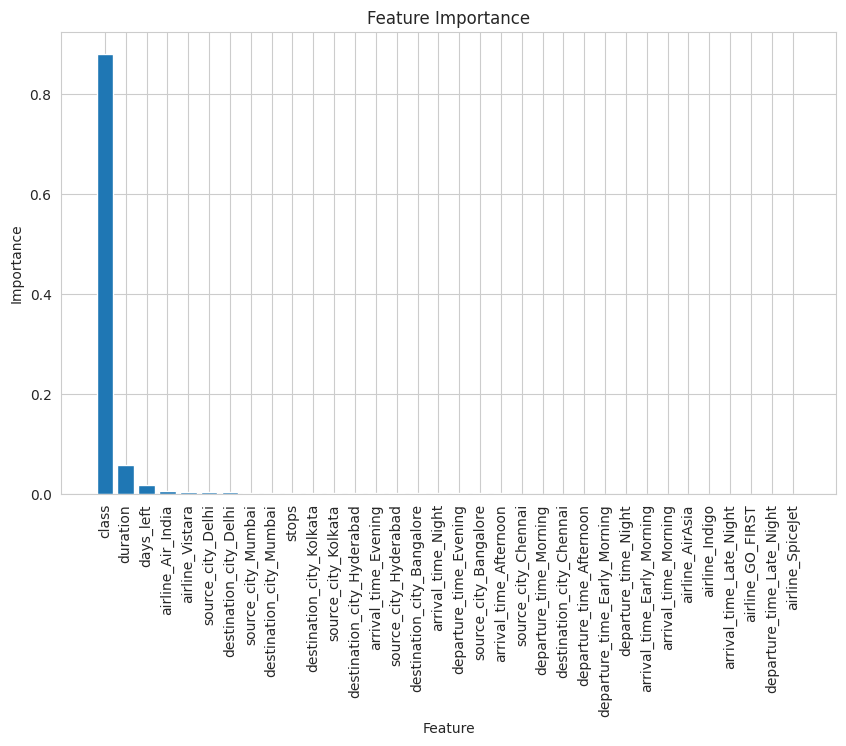

In [ ]:
import matplotlib.pyplot as plt

# Assuming feature_importance_df has columns: "Feature" and "Importance"
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [ ]:
##To find the bet hyperparameter

from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ['auto', 'sqrt']
}
# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2
)

# Fit GridSearch to the data
grid_search.fit(X_Training, Y_Training)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_




Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
205 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
